In [1]:
import sys
sys.path.append("/home/marin/projects/mhac/build")
import mhac

In [2]:
%matplotlib inline
import random, copy, math
import matplotlib.pyplot as plt
import numpy as np

In [3]:
def read_TSP_data(filepath="../../data/tsp/eil101.tsp"):
    cities = mhac.problems.tsp.Cities()

    with open(filepath, 'r') as infile:
        Name = infile.readline().strip().split()[1]
        FileType = infile.readline().strip().split()[1]
        Comment = infile.readline().strip().split()[1]
        Dimension = infile.readline().strip().split(":")[1]
        EdgeWeightType = infile.readline().strip().split()[1]
        infile.readline()

        for i in range(int(Dimension)):
            coords = infile.readline().strip().split()[1:]
            city = mhac.problems.tsp.City(int(coords[0]), int(coords[1]))
            cities.append(city)

    return cities

In [4]:
def displayTour(cities, solution):
    plt.figure(figsize = (16,8))
    N = len(cities)

    plt.axes()
    plt.plot([cities[solution[i % N]].x for i in range(N+1)], [cities[solution[i % N]].y for i in range(N+1)], 'bo-')
    plt.show()

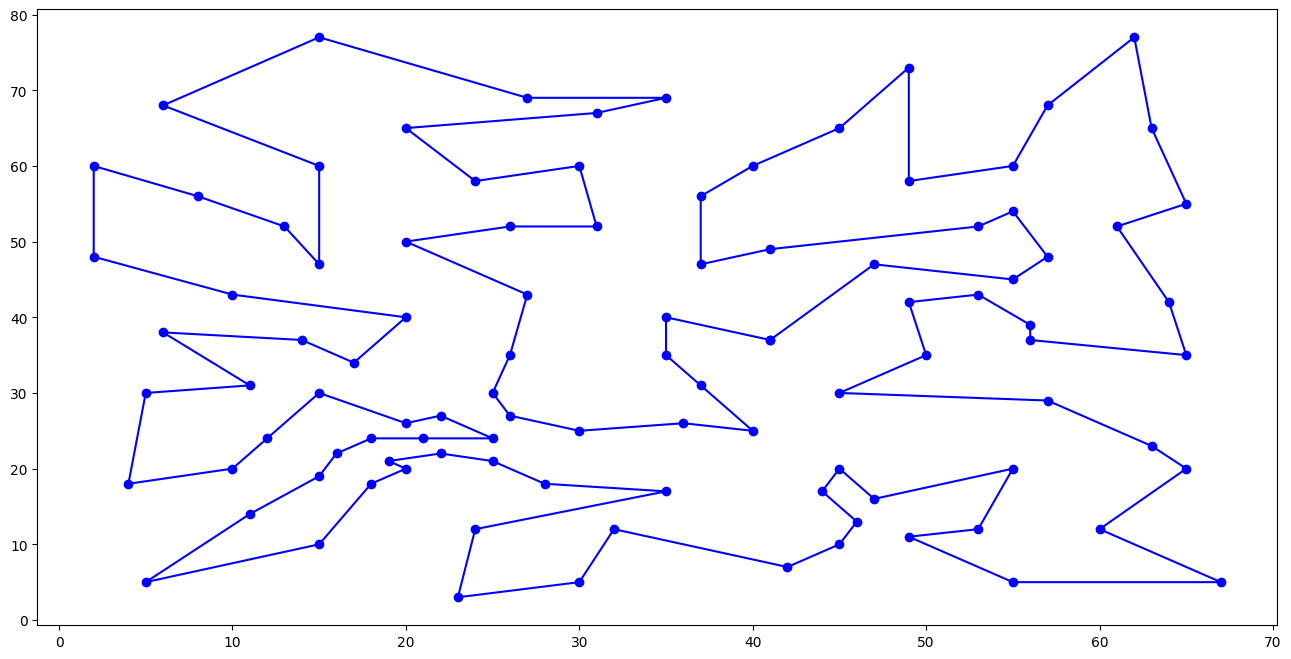

In [5]:
problem = mhac.problems.tsp.TSP(read_TSP_data())
SA = mhac.physics.SimulatedAnnealing(problem)
SA.solve(1000, 0.000001, 0.9995)
displayTour(problem.mCities, SA.getSolution().tour)

In [6]:
from mhac import common, problems

class PythonTSP(common.Problem):
    def __init__(self, cities):
        super().__init__()
        self.cities = cities
        self.N = len(cities)

    def generateInitialSolution(self):
        sol = problems.tsp.TSS()
        sol.tour = random.sample(range(self.N), self.N)
        return sol

    def generateNewSolution(self, initialSol: problems.tsp.TSS):
        i, j = sorted(random.sample(range(self.N), 2))
        newSol = problems.tsp.TSS()
        newSol.tour = initialSol.tour  # copying with pybind, not using python refs
        old_segment = newSol.tour[i:j+1]
        newSol.tour[i:j+1] = old_segment[::-1]  # Slice and reverse the segment
        return newSol

    def evaluateSolution(self, sol: problems.tsp.TSS):
        val = 0
        for i in range(self.N-1):
            val += self.cities[sol.tour[i]].distance(self.cities[sol.tour[i+1]])
        val += self.cities[sol.tour[0]].distance(self.cities[sol.tour[self.N-1]])
        return val

Because SA::solve internally uses base class Solution, PythonTSP::evaluateSolution is also going to be called with the base class

This deserves further investigation but not quite worth it...

Answer: Just define solution types in C++

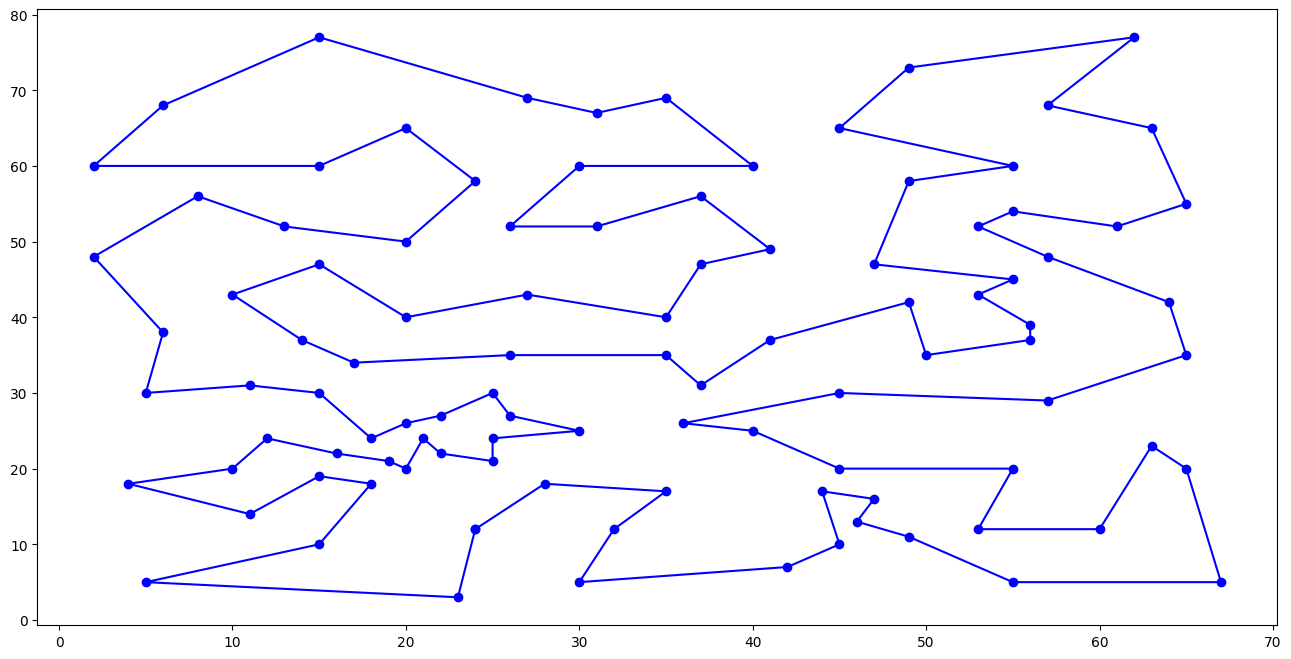

In [7]:
problem = PythonTSP(read_TSP_data())
SA = mhac.physics.SimulatedAnnealing(problem)
SA.solve(1000., 0.000001, 0.9995)
displayTour(problem.cities, SA.getSolution().tour)